# Plot spectra of layerwise kinetic energy

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cmocean as cmo
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
n = 256
L = 7e5
nk = n//2 +1
dk = 2 * np.pi / L
K = np.arange(0, nk)*2*np.pi/L # wavenumber vector

g = 9.81
f0 = 1e-4
H1 = 1000
H2 = 4000
rho1 = 1027.6
rho2 = 1028
gp = g*(rho2-rho1)/rho2

F1 = f0**2/(gp*H1)
F2 = f0**2/(gp*H2)
Kd = np.sqrt(F1 + F2)

layer_dict = {'1': 'upper layer', '2': 'lower layer'}

In [3]:
def plotSpectrumLayers(fig,ax,slope,field,layer,color,marker,showline=True):
    if field=='all':
        spectrum1 = pd.read_csv('../../Results/Results_GeophysicalFlows/SmallLd/spectra/spectrum_s'+slope+'_field1_layer'+layer+'.csv')
        spectrum2 = pd.read_csv('../../Results/Results_GeophysicalFlows/SmallLd/spectra/spectrum_s'+slope+'_field2_layer'+layer+'.csv')
        spectrum3 = pd.read_csv('../../Results/Results_GeophysicalFlows/SmallLd/spectra/spectrum_s'+slope+'_field3_layer'+layer+'.csv')
        spectrum_all = pd.concat([spectrum1,spectrum2,spectrum3],axis=1)
        spectrum = np.mean(spectrum_all,axis=1)
    else:
        spectrum = pd.read_csv('../../Results/Results_GeophysicalFlows/SmallLd/spectra/spectrum_s'+slope+'_field'+field+'_layer'+layer+'.csv')

    if layer=='1':
        factor = (1/2)*H1/(H1+H2)
    elif layer=='2':
        factor = (1/2)*H2/(H1+H2)

    #lower = np.where(K>np.sqrt(F1))[0][0]
    lower = np.nanargmax(spectrum)+1
    upper = int(np.floor(0.65*129)) # filter scale
    a, b = np.polyfit(np.log10(K[lower:upper+1]), np.log10(spectrum.iloc[lower:upper+1]*factor), 1)

    ax.plot(K/(Kd*2*np.pi),spectrum*factor,color=color,linewidth=1,marker=marker,markersize=5,label=layer_dict[layer])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1e-11,1e-1)
    ax.set_xlabel(r"$\kappa/\kappa_d$")
    ax.set_ylabel(r"Kinetic energy (m$^2$s$^{-2}$)")
    if showline:
        ax.plot(K[lower:upper+1]/(Kd*2*np.pi),10**(a*np.log10(K[lower:upper+1])+b),color='k',linestyle='--')
    return a


def plotSpectrumProduction(fig,ax,slope,field,color):
    if field=='all':
        spectrum1 = pd.read_csv('../../Results/Results_GeophysicalFlows/SmallLd/spectra/spectrum_s'+slope+'_field1_production.csv')
        spectrum2 = pd.read_csv('../../Results/Results_GeophysicalFlows/SmallLd/spectra/spectrum_s'+slope+'_field2_production.csv')
        spectrum3 = pd.read_csv('../../Results/Results_GeophysicalFlows/SmallLd/spectra/spectrum_s'+slope+'_field3_production.csv')
        spectrum_all = pd.concat([spectrum1,spectrum2,spectrum3],axis=1)
        spectrum = np.mean(spectrum_all,axis=1)
    else:
        spectrum = pd.read_csv('../../Results/Results_GeophysicalFlows/SmallLd/spectra/spectrum_s'+slope+'_field'+field+'_production.csv')

    ax.plot(K/(Kd*2*np.pi),spectrum,color=color,linewidth=1,marker='o',markersize=3)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1e-18,1e-5)
    ax.set_xlabel(r"$\kappa/\kappa_d$")
    ax.set_ylabel(r"Energy production rate (m$^2$s$^{-3}$)")

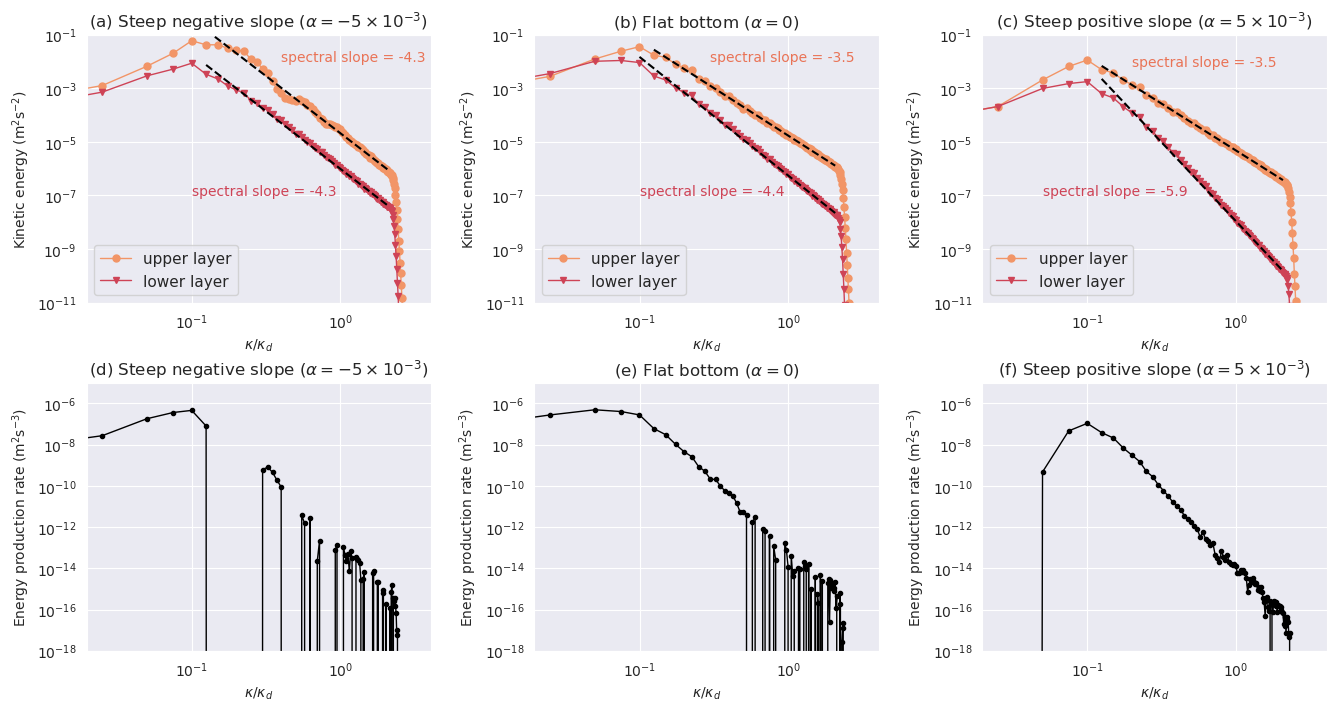

In [ ]:
cmap = matplotlib.colormaps.get_cmap('cmo.matter')
colors = cmap(np.linspace(0.25,0.5,2))

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(16,8))

# Kinetic energy per layer
a1 = plotSpectrumLayers(fig,ax1,'-5e-3','all','1',colors[0],'o')
a2 = plotSpectrumLayers(fig,ax1,'-5e-3','all','2',colors[1],'v')
ax1.text(4e-1,1e-2,'spectral slope = '+str(np.round(a1,1)),color=cmap(0.35))
ax1.text(1e-1,1e-7,'spectral slope = '+str(np.round(a2,1)),color=colors[1])

a1 = plotSpectrumLayers(fig,ax2,'0','all','1',colors[0],'o')
a2 = plotSpectrumLayers(fig,ax2,'0','all','2',colors[1],'v')
ax2.text(3e-1,1e-2,'spectral slope = '+str(np.round(a1,1)),color=cmap(0.35))
ax2.text(1e-1,1e-7,'spectral slope = '+str(np.round(a2,1)),color=colors[1])

a1 = plotSpectrumLayers(fig,ax3,'5e-3','all','1',colors[0],'o')
a2 = plotSpectrumLayers(fig,ax3,'5e-3','all','2',colors[1],'v')
ax3.text(2e-1,7e-3,'spectral slope = '+str(np.round(a1,1)),color=cmap(0.35))
ax3.text(5e-2,1e-7,'spectral slope = '+str(np.round(a2,1)),color=colors[1])

plotSpectrumProduction(fig,ax4,'-5e-3','all','k')
plotSpectrumProduction(fig,ax5,'0','all','k')
plotSpectrumProduction(fig,ax6,'5e-3','all','k')

for ax in [ax1,ax2,ax3]:
    ax.legend(fontsize=11,loc='lower left')

ax1.set_title(r'(a) Steep negative slope ($\alpha=-5 \times 10^{-3}$)')
ax2.set_title(r'(b) Flat bottom ($\alpha=0$)')
ax3.set_title(r'(c) Steep positive slope ($\alpha=5 \times 10^{-3}$)')

ax4.set_title(r'(d) Steep negative slope ($\alpha=-5 \times 10^{-3}$)')
ax5.set_title(r'(e) Flat bottom ($\alpha=0$)')
ax6.set_title(r'(f) Steep positive slope ($\alpha=5 \times 10^{-3}$)')

plt.subplots_adjust(hspace=0.3,wspace=0.3)
#plt.savefig('../../Figures/spectra.pdf', bbox_inches='tight')
plt.show()